# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


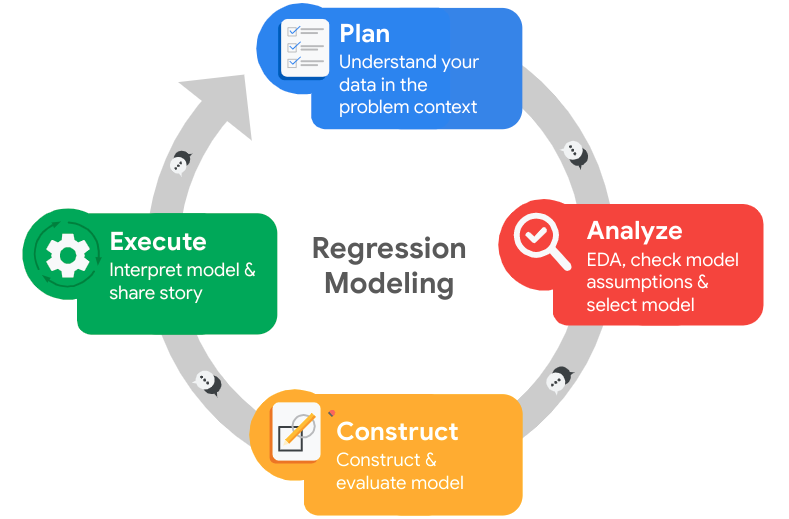

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




#### My Answers:

* The stakeholders are the Salifort Motors leadership team. 

* The objective of this project is to try to understand what factors may be contributing most to employee turnover, in order to attempt to improve employee retention and save costs on hiring and training new employees.

* Initial observations: 
    - satisfaction_level, last_evaluation, number_project, average_montly_hours, and time_spend_company are all numeric variables, the rest are categoric (even though Work_accident, left, and promotion_last_5years are integers, they represent boolean variables and are therefore categoric as well). 
    - There are some duplicated rows, but with the large number of employees and the limited information available, it is hard to know whether these are real duplicates or if they may be real entries (some employees may have conincidentaly had the same answers to the survey as another employee). We will drop these for now to not bias our models, but in reality it would be best to ask the owners of the data if they know whether these are real entries or not.
    
* Resources at this moment include: python, jupyter notebooks, the information on the project in the coursera course tabs, the PACE document provided by the course, documentation on the python functions used, and the link to the source of the data on Kaggle. 

* There doesn't seem to be any information that can identify the employees, and sensitive informaiton like salary is categorized to "low", "medium" and "high", rather than specifying amounts, so there don't seem to be any ethical issues at the moment. Perhaps the one consideration to make is that I, in this hypothetical scenario, would be an employee of this company that is asking me to analyze information about employee turnover, which could lead me to have a minor conflict of interest. However, as I am a professional who takes ethical considerations seriously, I will be wary of my own biases and take care not to let them influence my work.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

from xgboost import XGBClassifier
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df = df0.rename(columns={'satisfaction_level': 'satisfaction', 'last_evaluation': 'evaluation', \
                         'number_project': 'num_projects', 'average_montly_hours': 'monthly_hours', \
                         'time_spend_company': 'tenure', 'Work_accident': 'work_accident', \
                         'promotion_last_5years': 'promotion', 'Department': 'department'})

# Display all column names after the update
df.columns

Index(['satisfaction', 'evaluation', 'num_projects', 'monthly_hours', 'tenure',
       'work_accident', 'left', 'promotion', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df.isna().sum()

satisfaction     0
evaluation       0
num_projects     0
monthly_hours    0
tenure           0
work_accident    0
left             0
promotion        0
department       0
salary           0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

Shape of dataframe: (14999, 10)
Shape of dataframe with duplicates dropped: (11991, 10)


In [10]:
# Inspect some rows containing duplicates as needed
duplicates = df.duplicated()
df[duplicates]

,satisfaction,evaluation,num_projects,monthly_hours,tenure,work_accident,left,promotion,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()

# Display first few rows of new dataframe as needed
df.head()

,satisfaction,evaluation,num_projects,monthly_hours,tenure,work_accident,left,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

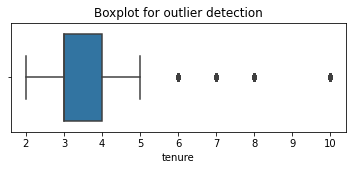

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig = plt.figure(figsize=(6,2))
plt.title('Boxplot for outlier detection')
sns.boxplot(x=df['tenure'])
plt.show()

In [13]:
# Determine the number of rows containing outliers
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3 - Q1
print(Q3 + 1.5 * IQR)

5.5


In [14]:
#If we take IQR*1.5 over the third quartile as outliers, than anything over 5.5 would be considered an outlier
df[(df['tenure'] > 5.5)].count()

satisfaction     824
evaluation       824
num_projects     824
monthly_hours    824
tenure           824
work_accident    824
left             824
promotion        824
department       824
salary           824
dtype: int64

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




#### My answers: 

- The strongest relationship between the variables is, as expected, an anti-correlation between employee satisfaction and leaving the company (i.e., the lower the satisfaction, the higher the chance an employee will leave). \
An employee having left the company is also correlated with tenure and anti-correlated with salary and with the employee having been involved in an accident. \
There is a positive correlation between the last evaluation score and both the number of projects and the average monthly hours worked, and between tenure and the number of projects. \
There is a positive correlation between tenure and the number of projects an employee is working on. 

- Most of the variables do not have a normal distribution. 
 - The satisfaction levels have a peak at very low values (around 0.1), then a much broader peak upward of 0.5. 
 - The scores on the last evaluation have a somewhat flat distribution between about 0.5 and 1 (with a small peak around 0.55). 
 - The average monthly hours worked is double peaked, with a peak around the usual 160 hours (~40h/week) and another around very high values (>260h, or ~65h/week). 
 - The number of projects is somewhat normally distributed (peaking at 4 projects). 
 - The number of years the employee has been at the company is nearly normal, but skewed towards lower values (peaking at 3 years). 
 
- One transformation that I made was to group the average monthly hours worked into bins of 10 hours. This was done in order to see the average satisfaction scores and the turnover rate accross the range of average monthly hours worked. This was especially useful because the plot of satisfaction per average monthly hours worked is very crowded and difficult to interpret. 

- The main purposes of performing EDA on a dataset before constructing a predictive model are to: 
 - better understand the data one is working with (data types, formats, etc); 
 - find if there are missing values or outliers that need to be dealt with before constructing the model; 
 - gain insights from the different independent variables to find out which are likely to be the main ones influencing the dependent variable; 
 - make transformations that may help to analyze the data or improve the model; 
 - determine which machine learning model is the most fit for the problem.

- The resources used in this stage included documentation on the different python libraries and functions used, and exemplars from previous courses, particularly the "Translate Data into Insights" course on EDA and data visualization.

- The main ethical concern I have at this point is that this company is clearly overworking some of it's best people. There are a number of employees working upward of 70 hours per week, and they are leaving at very high rates, as are the people working on too many projects at a time. These tend to be a group of employees with high evaluation scores, yet they are clearly underappreciated. The company needs to take its employees' mental health more seriously, not only to decrease turnover rates, but also because burned-out employees simply cannot manage to be very productive. As a result many burned-out workers tend to work longer hours to compensate for not being as productive as they are expected to be within the normal hours. This is also a sign of poor management.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
print('Total number who stayed: ', df['satisfaction'][df['left'] == 0].count())
print('Total number who left: ', df['satisfaction'][df['left'] == 1].count())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print('Percentage of employees that left: ', df['satisfaction'][df['left'] == 1].count()*100/df['satisfaction'].count() )

Total number who stayed:  10000
Total number who left:  1991
Percentage of employees that left:  16.604119756484028


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

#### Let's take a look at mean satisfaction levels and turnover rates for different categories. 

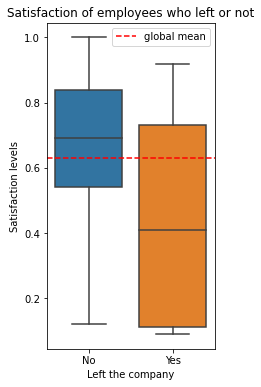

Mean satisfaction of employees who left:  0.44
Mean satisfaction of employees who did not leave: 0.67


Ttest_indResult(statistic=-35.88930498486623, pvalue=1.193953844039104e-228)

In [16]:
#First let's take a look at the variable that seems most likely to drive employees to leave 
#a company - satisfaction. 

#Let's see if there is a difference between mean satisfaction scores 
#among employees who left and employees who didn't 
satisfaction_left = df.groupby('left').mean()[['satisfaction']]
plt.figure(figsize=(3,6))
#ax = sns.barplot(x=satisfaction_left.index, y=satisfaction_left['satisfaction'])
ax = sns.boxplot(data=df, x='left', y='satisfaction') #, orient="h")
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title("Satisfaction of employees who left or not");
plt.xlabel("Left the company")
plt.ylabel("Satisfaction levels")
ax.set_xticklabels(['No', 'Yes'])
plt.show()

#Check if the difference is statistically significant 
left = df[df['left'] == 1]['satisfaction']
notleft = df[df['left'] == 0]['satisfaction']
print('Mean satisfaction of employees who left:  {:.2f}'.format(left.mean()) )
print('Mean satisfaction of employees who did not leave: {:.2f}'.format(notleft.mean()) )
stats.ttest_ind(a=left, b=notleft, equal_var=False)

We see that there is a statistically significant difference between the satisfaction levels of employees 
who left and those who didn't leave, from the t-test (with a very low p-value). Improving employee 
satisfaction would certainly lead to better employee retention (this is of course instinctive, but it's 
good to confirm with statistical tests). 

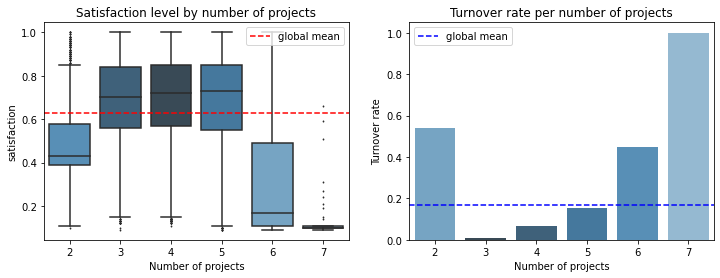

In [17]:
#Now we can look at what variables may be connected with higher or lower satisfaction 

#Let's look at the number of projects an employee contributes to
satisfaction_nprojects = df.groupby('num_projects').mean()[['satisfaction', 'left']]

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

pal = sns.color_palette("Blues_d", len(satisfaction_nprojects))
rank = satisfaction_nprojects['satisfaction'].argsort().argsort()
ax = sns.boxplot(ax = ax1, data=df, x='num_projects', y='satisfaction', fliersize=1, \
                palette=np.array(pal)[rank])
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax.legend(loc='upper right')
ax1.set_title("Satisfaction level by number of projects")
ax1.set_xlabel("Number of projects")

rank = satisfaction_nprojects['left'].argsort().argsort()
ax = sns.barplot(ax = ax2, x=satisfaction_nprojects.index, y=satisfaction_nprojects['left'], \
                 palette=np.array(pal[::-1])[rank])
ax.axhline(df['left'].mean(), ls='--', color='blue', label='global mean')
ax.legend()
ax2.set_title('Turnover rate per number of projects')
ax2.set_xlabel("Number of projects")
ax2.set_ylabel("Turnover rate")
plt.show()

These plots show that both employees who have few projects and employees who have too many projects are less satisfied and have higher turnover rates than those who have 3-5 projects. 

On the lower end, employees who have less than 3 projects may be people who have already been fired or given their notice, and are therefore taking on fewer projects to finish up. Some may also be part-time workers, who may have higher turnover rates (this will be checked when we look at monthly hours worked versus turnover rate). 

On the higher end, employees are likely overworked and exhausted when given too many projects. In fact, from the right plot we can see that 100% of employees who took on 7 projects left the company. They were clearly overworked. 

Perhaps establishing a policy for a maximum number of 5 projects per employee may be beneficial for employee satisfaction and improve turnover rates. 

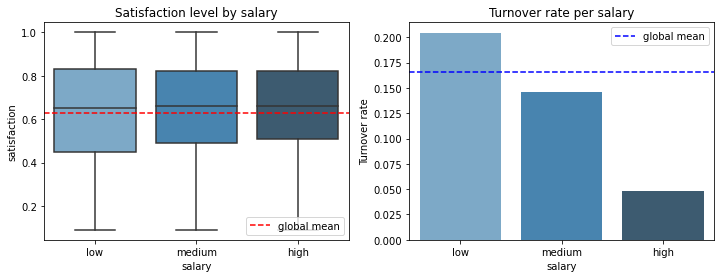

Mean satisfaction for low salaries:  0.62
Mean satisfaction for medium salaries: 0.63
Mean satisfaction for high salaries: 0.64


In [18]:
#Let's look at mean satisfaction for different salary levels
order_dict = {'low': 0, 'medium': 1, 'high': 2}
satisfaction_salary = df.groupby('salary').mean()[['satisfaction', 'left']]
satisfaction_salary['order'] = [3, 1, 2] 
satisfaction_salary = satisfaction_salary.sort_values(by='order')

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

pal = sns.color_palette("Blues_d", len(satisfaction_salary))
rank = satisfaction_salary['satisfaction'].argsort().argsort()
ax = sns.boxplot(ax = ax1, data=df, x='salary', y='satisfaction', fliersize=1, \
                palette=np.array(pal)[rank])
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax.legend(loc='lower right')
ax.set_title('Satisfaction level by salary')

rank = satisfaction_salary['left'].argsort().argsort()
ax = sns.barplot(ax=ax2, x=satisfaction_salary.index, y=satisfaction_salary['left'], \
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['left'].mean(), ls='--', color='blue', label='global mean')
ax.legend()
ax2.set_title('Turnover rate per salary')
ax2.set_ylabel("Turnover rate")
plt.show()

print('Mean satisfaction for low salaries:  {:.2f}'.format(satisfaction_salary.loc['low'].iloc[0]) )
print('Mean satisfaction for medium salaries: {:.2f}'.format(satisfaction_salary.loc['medium'].iloc[0]) )
print('Mean satisfaction for high salaries: {:.2f}'.format(satisfaction_salary.loc['high'].iloc[0]) )

We can see that there doesn't seem to be much of a difference between the satisfaction levels across different salaries. However, there is a significant difference in turnover rate. The percentage of employees who leave the company is much higher for low salaries than for low ones (employees with higher salaries are likely to be more senior employees and higher ranked employees, who are more valuable to the company). 

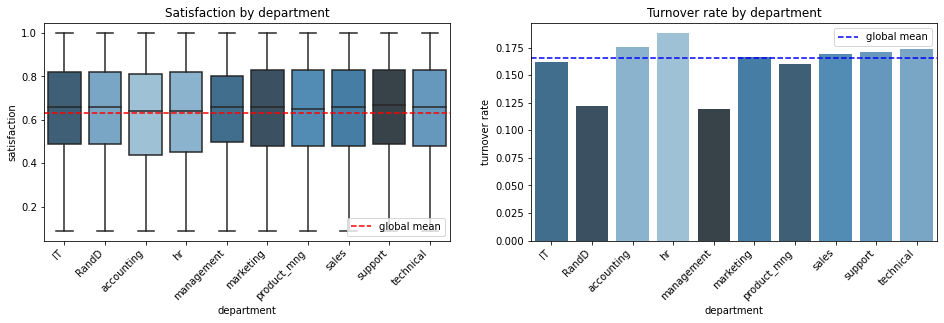

Averages:


,satisfaction,left
department,,
IT,0.634016,0.161885
RandD,0.627176,0.122478
accounting,0.607939,0.175523
hr,0.621947,0.188020
management,0.631995,0.119266
marketing,0.634770,0.166419
product_mng,0.629825,0.160350
sales,0.631349,0.169805
support,0.634822,0.171334


In [19]:
#Let's see if there is any difference among the different departments
satisfaction_dep = df.groupby('department').mean()[['satisfaction', 'left']]
order = np.sort(df['department'].unique())
#print(order)

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 4))

pal = sns.color_palette("Blues_d", len(satisfaction_dep))
rank = satisfaction_dep['satisfaction'].argsort().argsort()
ax = sns.boxplot(ax = ax1, data=df, x='department', y='satisfaction', fliersize=1, \
                palette=np.array(pal)[rank], order = order)
#ax = sns.barplot(ax=axes[0], x=satisfaction_dep.index, y=satisfaction_dep['satisfaction'], \
#            palette=np.array(pal)[rank])
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax.legend(loc='lower right')
ax1.set_title('Satisfaction by department')
ax1.set_xticklabels(order, rotation=45, horizontalalignment='right')

rank = satisfaction_dep['left'].argsort().argsort()
ax = sns.barplot(ax=ax2, x=satisfaction_dep.index, y=satisfaction_dep['left'], \
            palette=np.array(pal[::-1])[rank], order = order)
ax.axhline(df['left'].mean(), ls='--', color='blue', label='global mean')
ax.legend()
ax2.set_title('Turnover rate by department')
ax2.set_ylabel('turnover rate')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

print('Averages:')
satisfaction_dep #ANOVA test to see if there is a statistically significant difference?

It looks like satisfaction levels are similar among the different departments. However when we look at turnover rate, there does seem to be a slightly higher turnover in the HR department and significantly lower in management and R&D. 

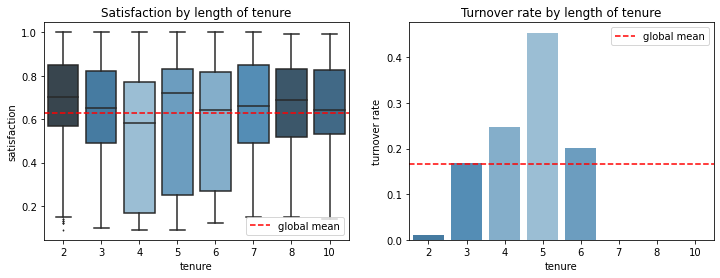

In [20]:
#Let's look at tenure
satisfaction_tenure = df.groupby('tenure').mean()[['satisfaction', 'left']]

pal = sns.color_palette("Blues_d", len(satisfaction_tenure))
rank = satisfaction_tenure['satisfaction'].argsort().argsort()
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))

#plt.figure(figsize=(6,4))
ax = sns.boxplot(ax = ax1, data=df, x='tenure', y='satisfaction', fliersize=1, \
                palette=np.array(pal)[rank])
#ax = sns.barplot(ax = ax1, x=satisfaction_tenure.index, y=satisfaction_tenure['satisfaction'], \
#            palette=np.array(pal)[rank])
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax1.set_title('Satisfaction by length of tenure')
ax.legend(loc='lower right')

#plt.title('Mean satisfaction by length of tenure')
rank = satisfaction_tenure['left'].argsort().argsort()
ax = sns.barplot(ax = ax2, x=satisfaction_tenure.index, y=satisfaction_tenure['left'], \
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['left'].mean(), ls='--', color='red', label='global mean')
ax.legend()
ax2.set_ylabel("turnover rate")
ax2.set_title('Turnover rate by length of tenure')
plt.show()

One the left plot we can see that the least satisfied employees are the ones that have been at the company for 4-6 years. On the right we see that these are exactly the ones who are leaving the company at a higher frequency (especially at 5 years). The company should focus attention on employees who have been there for 4-6 years to better understand why they are less satisfied and why they are leaving more often. Perhaps there are not many prospects for career progression after 3 or 4 years.

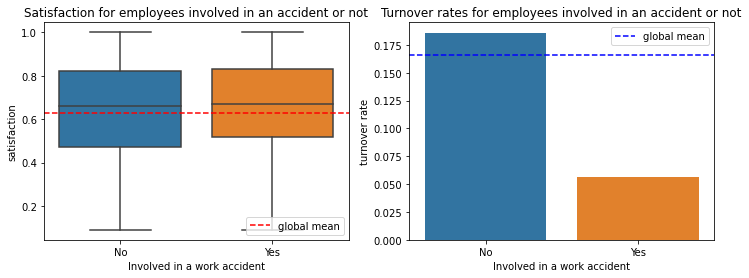

Mean satisfaction of employees who were involved in a work accident:  0.65
Mean satisfaction of employees who were not involved in a work accident: 0.63


In [21]:
#Let's look at employees who have been involved in a work accident or not 
satisfaction_accident = df.groupby('work_accident').mean()[['satisfaction', 'left']]

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax = sns.boxplot(ax = ax1, data=df, x='work_accident', y='satisfaction', fliersize=1)
#ax = sns.barplot(ax=axes[0], x=satisfaction_accident.index, y=satisfaction_accident['satisfaction'])
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax.legend(loc='lower right')
ax1.set_title("Satisfaction for employees involved in an accident or not")
ax1.set_xlabel("Involved in a work accident")
ax1.set_xticklabels(['No', 'Yes'])

ax = sns.barplot(ax=ax2, x=satisfaction_accident.index, y=satisfaction_accident['left'])
ax.axhline(df['left'].mean(), ls='--', color='blue', label='global mean')
ax.legend()
ax2.set_title("Turnover rates for employees involved in an accident or not")
ax2.set_xlabel("Involved in a work accident")
ax2.set_ylabel("turnover rate")
ax2.set_xticklabels(['No', 'Yes'])
plt.show()

#Check if the difference is statistically significant 
accident = df[df['work_accident'] == 1]['satisfaction']
noaccident = df[df['work_accident'] == 0]['satisfaction']
print('Mean satisfaction of employees who were involved in a work accident:  {:.2f}'.format(accident.mean()) )
print('Mean satisfaction of employees who were not involved in a work accident: {:.2f}'.format(noaccident.mean()) )

Seems like being involved in a work accident does not necessarily leave the employee less satisfied 
with the company. In fact, turnover rate is higher for employees who have not been involved in an accident 
(this may be coincidental, or it may be that the company's response to accidents is very satisfactory for 
those employees). 

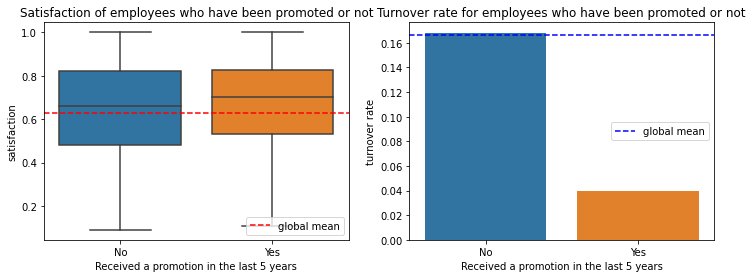

Mean satisfaction of employees who were promoted in the last 5 years:  0.67
Mean satisfaction of employees who were not promoted in the last 5 years: 0.63


Ttest_indResult(statistic=2.486861824251393, pvalue=0.013661575158415195)

In [22]:
#Let's compare employees who have been promoted in the last 5 years with those who haven't
satisfaction_promotion = df.groupby('promotion').mean()[['satisfaction', 'left']]

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(12, 4))

ax = sns.boxplot(ax = ax1, data=df, x='promotion', y='satisfaction', fliersize=1)
#ax = sns.barplot(ax=ax1, x=satisfaction_promotion.index, y=satisfaction_promotion['satisfaction'])
ax.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax.legend(loc='lower right')
ax1.set_title("Satisfaction of employees who have been promoted or not")
ax1.set_xlabel("Received a promotion in the last 5 years")
ax1.set_xticklabels(['No', 'Yes'])

ax = sns.barplot(ax=ax2, x=satisfaction_promotion.index, y=satisfaction_promotion['left'])
ax.axhline(df['left'].mean(), ls='--', color='blue', label='global mean')
ax.legend()
ax2.set_title("Turnover rate for employees who have been promoted or not")
ax2.set_xlabel("Received a promotion in the last 5 years")
ax2.set_ylabel("turnover rate")
ax2.set_xticklabels(['No', 'Yes'])
plt.show()

#Check if the difference is statistically significant 
promo = df[df['promotion'] == 1]['satisfaction']
nopromo = df[df['promotion'] == 0]['satisfaction']
print('Mean satisfaction of employees who were promoted in the last 5 years:  {:.2f}'.format(promo.mean()) )
print('Mean satisfaction of employees who were not promoted in the last 5 years: {:.2f}'.format(nopromo.mean()) )
stats.ttest_ind(a=promo, b=nopromo, equal_var=False)

As is somewhat to be expected, employees who have received a promotion in the last 5 years tend to be 
more satisfied with the company and have lower turnover (leaving before 5 years is also a factor that can 
contribute to this particular number). 

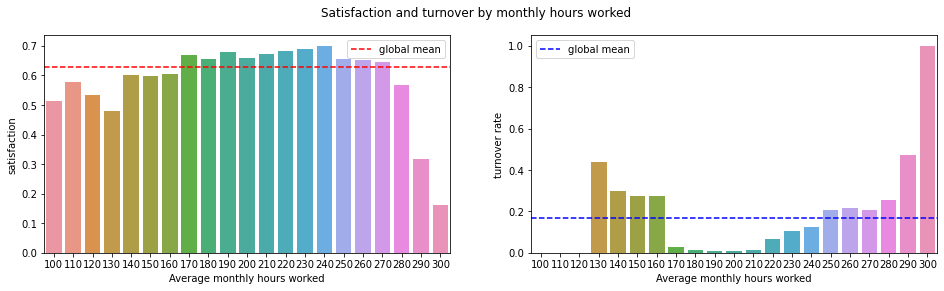

In [24]:
#Let's look at average hours worked

# Define bins of 2 hours
bins = [90] + list(range(100, 310, 10))  # Creates bins from 0 to 310 hours 
bins_names = [str(number) for number in bins[1:]]

# Use cut and mean together with Series.groupby
satisfaction_hours = df.groupby(pd.cut(df['monthly_hours'], bins=bins, labels=bins_names))['satisfaction'].mean()
left_hours = df.groupby(pd.cut(df['monthly_hours'], bins=bins, labels=bins_names))['left'].mean()

fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(16, 4))

ax = sns.barplot(ax = ax1, x=satisfaction_hours.index, y=satisfaction_hours)
ax1.axhline(df['satisfaction'].mean(), ls='--', color='red', label='global mean')
ax1.legend()
#plt.title("Mean satisfaction versus monthly hours worked")
ax1.set_xlabel("Average monthly hours worked")
#plt.show()

ax = sns.barplot(ax = ax2, x=left_hours.index, y=left_hours)
ax.axhline(df['left'].mean(), ls='--', color='blue', label='global mean')
ax.legend()
plt.suptitle("Satisfaction and turnover by monthly hours worked")
ax2.set_xlabel("Average monthly hours worked")
ax2.set_ylabel("turnover rate")
plt.show()

It seems that employees who work too many hours are less satisfied than average, but this is only the case 
at very large values of average monthly hours worked (over 280 hours). However, even with average satisfaction 
rates, those who work more than 240 hours per month are leaving at a higher than average rate. These employees are clearly overworked.

Employees who work less than 160 monthly hours also tend to be less satisfied and leave at a higher than average rate. Some of these may be part-time employees, and some may be employees who already planned to leave and were diminishing their workload.

Employees who work between 170 and 210 hours per month on average have very low tunover rates.

#### Now let's look at the distributions of the numeric variables.

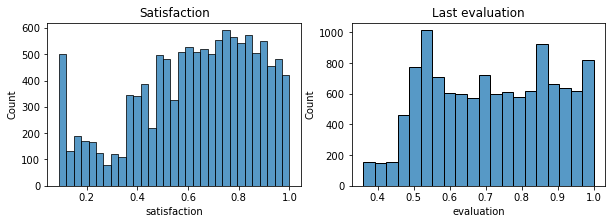

In [23]:
#Lets look at the distributions of the numeric variables
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(ax = axes[0], x=df['satisfaction'])
axes[0].set_title('Satisfaction')
sns.histplot(ax = axes[1], x=df['evaluation'], bins = 20)
axes[1].set_title('Last evaluation')
plt.show()

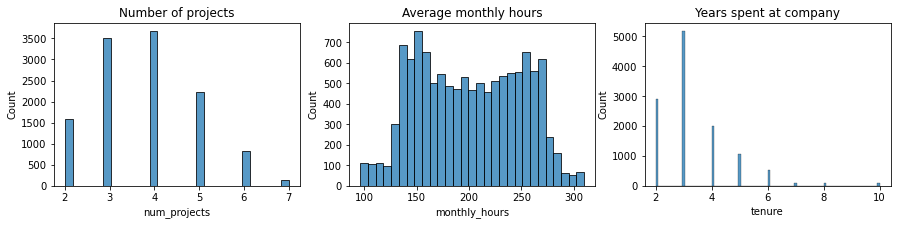

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(ax = axes[0], x=df['num_projects'])
axes[0].set_title('Number of projects')
sns.histplot(ax = axes[1], x=df['monthly_hours'])
axes[1].set_title('Average monthly hours')
sns.histplot(ax = axes[2], x=df['tenure'])
axes[2].set_title('Years spent at company')
plt.show()

None of these distributions are normal. Some are double peaked, some are skewed. We will need a model that doesn't assume the data is normally distributed. 

#### Now let's check for relationships between the numerical variables.

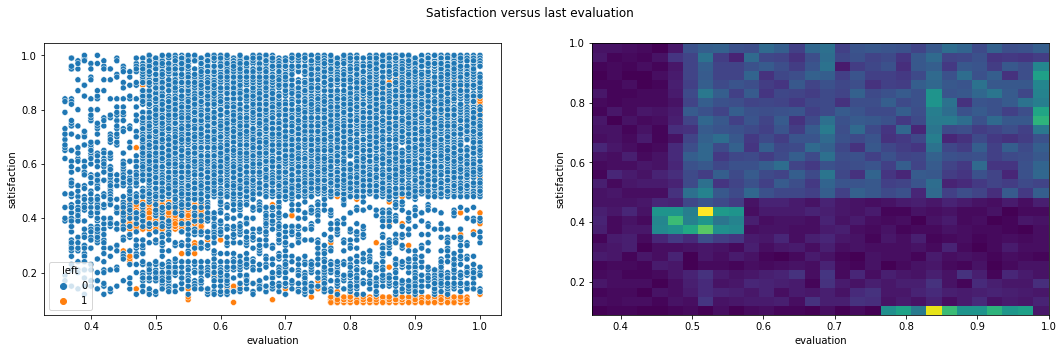

In [25]:
# satisfaction vs last evaluation
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Satisfaction versus last evaluation')
sns.scatterplot(ax = axes[0], x=df['evaluation'], y=df['satisfaction'], hue=df['left'])
plt.hist2d(x=df['evaluation'], y=df['satisfaction'], bins=30)
plt.xlabel('evaluation')
plt.ylabel('satisfaction')
plt.show()

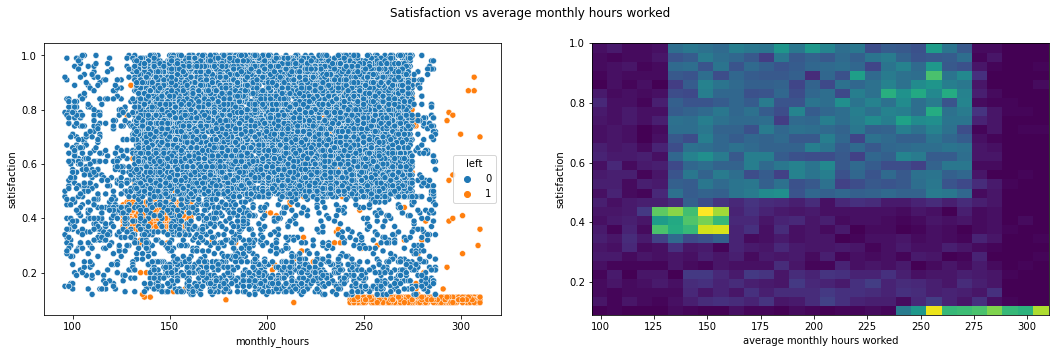

In [26]:
# Satisfaction vs monthly hours worked
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Satisfaction vs average monthly hours worked')
sns.scatterplot(ax = axes[0], x=df['monthly_hours'], y=df['satisfaction'], hue=df['left'])
plt.hist2d(x=df['monthly_hours'], y=df['satisfaction'], bins=30)
plt.xlabel('average monthly hours worked')
plt.ylabel('satisfaction')
plt.show()

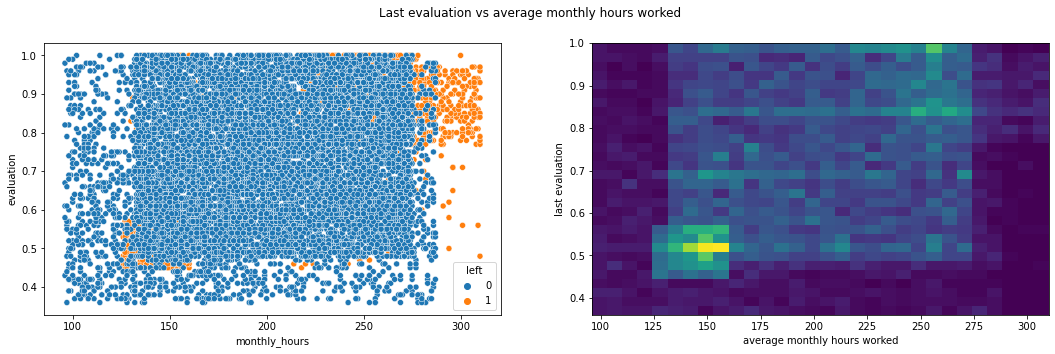

In [27]:
# Last evaluation vs monthly hours worked 
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Last evaluation vs average monthly hours worked')
sns.scatterplot(ax = axes[0], x=df['monthly_hours'], y=df['evaluation'], hue=df['left'])
plt.hist2d(x=df['monthly_hours'], y=df['evaluation'], bins=30)
plt.xlabel('average monthly hours worked')
plt.ylabel('last evaluation')
plt.show()

We can see that there is a group of employees who have left the company (orange) who had high evaluation scores from their last evaluation (>0.75) and worked very long hours (>240/month), who have extremely low satisfaction levels (they are at the bottom right corner in the first 2 plots and the top right corner of the third plot). These employees were clearly overworked and felt undervalued at this company.

#### Now let's look at the correlations between the different variables.

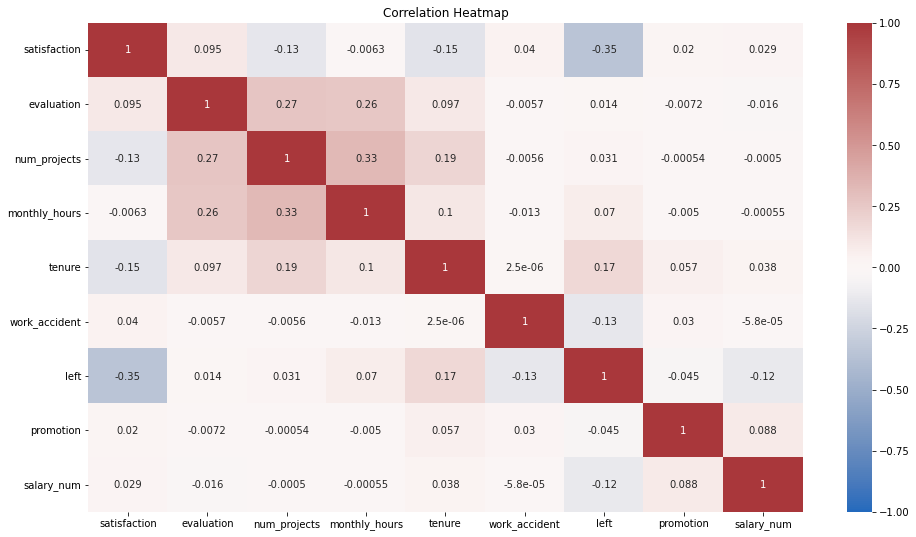

In [28]:
#Make a numerical variable for salaries
df['salary_num'] = df['salary'].map({'low': 1, 'medium': 2, 'high': 3}) 

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap');

As was to be expected, the strongest trend we find is an anti-correlation between satisfaction and an employee leaving the company (correlation coefficient: -0.35). 

Tenure is the next variable that most correlates with leaving the company (coef: 0.17). However, as we have seen, this is not exactly a linear correlation. Instead there is a peak in turnover at around 5 years of tenure, after which it begins to decline.

There is a strong correlation between average monthly hours worked and number of projects (coef: 0.33). As we have seen, employees who work very long hours and employees who take on many projects have a strong chance of leaving the company, therefore there is likely an issue with employees being overworked and unsatisfied. There is also a positive correlation between the last evaluation score and both number of projects and monthly hours worked.

### Insights

As can be expected, employees who have left tend to be less satisfied with the company than those who have 
not left. 

A few factors seem to contribute to satisfaction: 

- Employees who take on too many projects (>5) and employees who work too many hours a month (>240) have lower satisfaction rates and tend to leave the company more often than others. These employees likely feel overworked and underappreciated. 

- Employees who take on too few projects (<3) or work too few hours (<160) also tend to have lower levels of satisfaction and higher turnover rates. Many of these may be employees who were already planning on leaving and were diminishing their workload. 

- Employees who have been working at the company for 4-6 years tend to be less satisfied than those who have been working there for less than 4 years or greater than 6 years. The company may not offer great prospects on career progression after the first few years.

- Employees who have been promoted in the last 5 years have slightly higher satisfaction rates than those who have not and have much lower turnover rates (however this result could be biased by the high turnover rate before 5 years). 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



#### My answers: 

- The scatter plots relating evaluation, satisfaction and average monthly hours worked have a strange distribution, with some odd "boxes" concentrating some of the scores. I would expect them to be a little more evenly distributed, or more random. 

- The main variables chosen for the final models were: 
    - last evaluation; 
    - tenure; 
    - number of projects worked on; 
    - average monthly hours worked (in a binary format called "overworked" - equal to 1 for those who worked over 210 hours that month and 0 for those who didn't); 
    - salary; 
    - department (this was not used for the XGBoost model, since it did not show a strong influence in the random forest model). 
    - Satisfaction was also initially included, but since it is not expected that the company would have this value for all employees, it was not included in the final model. \
These variables were chosen because they were the ones that showed the strongest impact on determining whether or not an employee would leave the company. 
 
- The assumptions are not all met for the logistic regression model (for instance, there is some multicollinearity and there are some outliers). This model did not fit the data well and was discarded. \
For the random forest and XGBoost models, there aren't as many assumptions, so these models are both adequate for the job.

- The random forest model and XGBoost model fit the data quite well, with recall and F1 scores of about 0.9 and accuracy and precision above 0.9 for both models.

- There is always room for improvement. Fitting additional hyperparameters to the XGBoost model may reveal a better result, however this requires more computing time. The result of both models is very satisfactory. 

- The resources used in this stage included documentation on the different python libraries and functions used, and exemplars from previous courses (specifically the labs on building logistic regression models, random forest models, and XGBoost models). 

- I do not have any additional ethical considerations to make at this point.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

I need to predict a categorical variable based on multiple independent variables that are both numerical and catergorical. 

### Identify the types of models most appropriate for this task.

I will do a simple logistic regression first to see how well it predicts the outcome. Then I will try a 
random forest and XGBoost to compare the results to see which is the best model.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### First we need to transform the categorical variables that are strings to numeric format, and drop redundant columns.

In [29]:
#Encode 'department' and 'salary' columns
df1 = pd.get_dummies(df, columns=['department'], drop_first='True')
df1 = df1.drop('salary', axis=1) #We have already create a numerical 'salary_num' column

df1.head()

,satisfaction,evaluation,num_projects,monthly_hours,tenure,work_accident,left,promotion,salary_num,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Now let's start by performing logistic regression between the variables 'left' and 'satisfaction'.

In [30]:
#Let's start by separating the X and Y variables 
y = df1['left']
X = df1[['satisfaction']]

#Now let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
#I will try first without stratifying, since the y variable is split more or less 20-80, which is not too drastic.

In [31]:
#Build our classifier, and fit the model to the data
clf = LogisticRegression().fit(X_train,y_train)

In [32]:
#Now let's get the coefficients and visualize the model 
clf.coef_

array([[-3.79601032]])

In [33]:
#See the intercept
clf.intercept_

array([0.5134269])

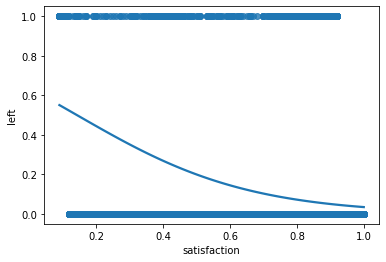

In [34]:
# Plot the logistic regression and its confidence band
sns.regplot(x="satisfaction", y="left", data=df1, logistic=True, ci=None)

Let's construct a confusion matrix to judge the results.

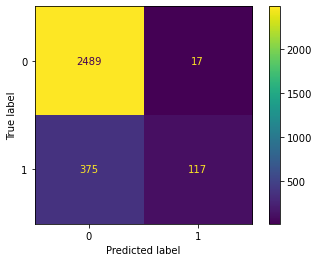

In [35]:
#First save the predictions
y_pred = clf.predict(X_test)

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')

As we can see from the confusion matrix, if we only take into account employee satisfaction, we do not manage 
to predict most of the employees who will in fact leave. Of the 492 employees who did in fact leave, this 
model only managed to predict 117 of them accurately. 

#### Now let's try a logistic regression model with more parameters.

In [36]:
#Let's remove the outliers from tenure since logistic regression can't handle outliers well
df_no_outliers = df1[(df1['tenure'] <= 5.5)] 

#Let's start by separating the X and Y variables 
y = df_no_outliers['left']
X = df_no_outliers[['satisfaction', 'evaluation', 'salary_num', 'monthly_hours', 'num_projects', 'tenure']]
#These are the variables that correlate a bit more with turnover 
#(except for tenure, but it has some outliers, which logistic regression can't handle well)

#Now let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
#I will try first without stratifying, since the y variable is split more or less 20-80, which is not too drastic.

In [37]:
X.dtypes

satisfaction     float64
evaluation       float64
salary_num         int64
monthly_hours      int64
num_projects       int64
tenure             int64
dtype: object

In [38]:
#Scale data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform (scale) the training and testing features
X_train_scaled = scaler.transform(X_train)

In [39]:
#Build our classifier, and fit the model to the data
clf2 = LogisticRegression().fit(X_train_scaled,y_train)

#Now let's get the coefficients and visualize the model 
print(clf2.coef_)

#See the intercept
print(clf2.intercept_)

[[-1.07578503  0.02160375 -0.3272882   0.15211961 -0.50708486  0.90000613]]
[-2.25673344]


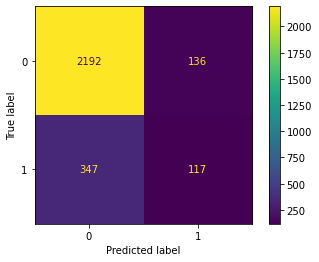

In [40]:
#First save the predictions
X_test_scaled = scaler.transform(X_test)
y_pred = clf2.predict(X_test_scaled)

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf2.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf2.classes_)
disp.plot(values_format='')

This model does not perform very well, it is even a little worse than the model that only took satisfaction into consideration. Clearly logistic regression is not the ideal model for this case.

#### Let's try a random forest model.

In [41]:
#Let's start by separating the X and Y variables 
y = df1['left']
X = df1.drop('left', axis=1) 

#Now let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [42]:
#Build our classifier
rf = RandomForestClassifier(random_state=12)

#Determine set of hyperparameters.
cv_params = {'max_depth': [10,15,20,None], 
             'min_samples_leaf': [2,5,10],
             'min_samples_split': [0.001, 0.001],
             'max_features': [5,6,8,10,20],
             'n_estimators': [150,200,300,500]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [43]:
#Search over specified parameters
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1', n_jobs = -1, verbose=1)

In [85]:
%time
#Run model
rf_cv.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
Fitting 4 folds for each of 480 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 33.8min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=12,
                                  

In [87]:
# Obtain optimal parameters.
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 0.001,
 'n_estimators': 150}

In [44]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(n_estimators = 150, max_depth = 10, 
                                min_samples_leaf = 2, min_samples_split = 0.001,
                                max_features=10, random_state = 12)

In [45]:
%%time
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

CPU times: user 1.29 s, sys: 18.7 ms, total: 1.31 s
Wall time: 1.31 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [90]:
#Use pickle to save the model
pickle.dump(rf_opt, open('rf_opt.sav', 'wb'))

In [14]:
## Read in pickled model
#rf_opt = pickle.load(open('rf_opt.sav', 'rb'))

In [46]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

In [47]:
#Obtain performance scores

# Get precision score.
pc_test = precision_score(y_test, y_pred, pos_label = 1)
print("The precision score is {pc:.3f}".format(pc = pc_test))
# Get recall score.
rc_test = recall_score(y_test, y_pred, pos_label = 1)
print("The recall score is {rc:.3f}".format(rc = rc_test))
# Get accuracy score.
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
# Get F1 score.
f1_test = f1_score(y_test, y_pred, pos_label = 1)
print("The F1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.991
The recall score is 0.909
The accuracy score is 0.984
The F1 score is 0.948


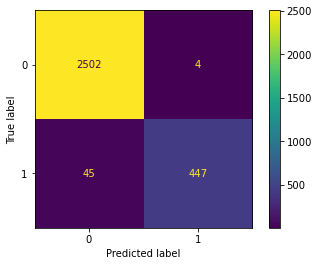

In [48]:
#Make a confusion matrix

#First save the predictions
y_pred = rf_opt.predict(X_test)

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = rf_opt.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot(values_format='')

This is much better than the logistic regression model. In this model, we only miss about 10% of the employees 
who leave.

Let's look at which features were most relevant for the model.

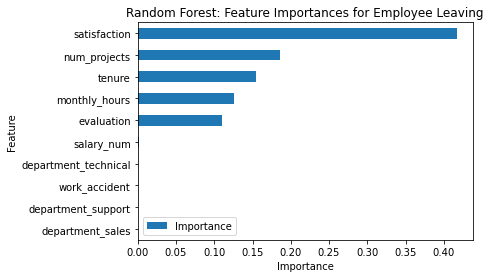

In [49]:
# Get feature importances
feat_impt = rf_opt.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_opt.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

**Now let's refine our model.**

Assuming that not every employee will have filled out a survey where they state their satisfaction level with 
the company, it is probably best to create a model that doesn't depend on this parameter. That way the company 
can predict whether or not an employee is likely to leave the company without needing this information. So I will remove this variable.

The column "promotion_last_5years" doesn't seem to have a significant influence on the model and might even skew the results a bit, since anyone who left the company after only 1 or 2 years wouldn't be expected to have received a promotion and most of the employees don't stay at the company for more than 5 years anyway. Also the mean satisfaction levels of employees who did not receive a promotion in the last 5 years is not significantly different from employees who did (possibly in part because this variable wouldn't affect the satisfaction of employees who haven't been at the company for very long yet). I will therefore remove this variable.

I will also remove "work_accident", since being involved in an accident actually seems to increase an employee's chance of staying in the company. We obviously don't want to do anything to encourage having more work accidents, so it doesn't make sense to keep this variable in the model.

The variable monthly_hours may introduce some bias into our model, because the the employees who work less than 160 hours a month and left the company may be employees who had already decided to quit (or been fired) and were just finishing their projects or completing their notice period. It is more important to try to identify the employees who are overworked and feel underapreciated. I will create a new variable called "overworked" to identify employees who work more than 210 monthly hours, since this is linked with higher turnover rates. I will remove the variable "monthly_hours" from the model.

In [50]:
##Feature engineering
df1['overworked'] = df1['left'] * 0
#We will define someone who is overworked if they work longer than 210 hours a month 
#on average (since this is where turnover begins to increase). 
df1['overworked'][(df1['monthly_hours'] > 210)] = 1 
df1.head(10)

,satisfaction,evaluation,num_projects,monthly_hours,tenure,work_accident,left,promotion,salary_num,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0
6,0.10,0.77,6,247,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1
7,0.92,0.85,5,259,5,0,1,0,1,0,0,0,0,0,0,1,0,0,1
8,0.89,1.00,5,224,5,0,1,0,1,0,0,0,0,0,0,1,0,0,1
9,0.42,0.53,2,142,3,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [52]:
#Let's start by separating the X and Y variables 
y = df1['left']
X = df1.drop(columns=['left', 'satisfaction', 'promotion', 'work_accident', 'monthly_hours']) 

#Now let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [53]:
#Build our classifier
rf = RandomForestClassifier(random_state=12)

#Determine set of hyperparameters.
cv_params = {'max_depth': [10,15,20,None], 
             'min_samples_leaf': [2,5,10],
             'min_samples_split': [0.001, 0.01],
             'max_features': [8,10,15],
             'n_estimators': [150,200,300]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [54]:
#Search over specified parameters
rf2_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1', n_jobs = -1, verbose=1)

In [55]:
%time
#Run model
rf2_cv.fit(X_train, y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.5 µs
Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.2min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=12,
                                  

In [57]:
# Obtain optimal parameters.
rf2_cv.best_params_

{'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 0.01,
 'n_estimators': 150}

In [58]:
# Use optimal parameters on GridSearchCV.
rf2_opt = RandomForestClassifier(n_estimators = 150, max_depth = 10, 
                                min_samples_leaf = 2, min_samples_split = 0.01,
                                max_features=10, random_state = 12)

In [59]:
%%time
# Fit the optimal model.
rf2_opt.fit(X_train, y_train)

CPU times: user 1.02 s, sys: 20.9 ms, total: 1.04 s
Wall time: 1.05 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [64]:
#Use pickle to save the model
pickle.dump(rf2_opt, open('rf2_opt.sav', 'wb'))

In [ ]:
## Read in pickled model
#rf2_opt = pickle.load(open('rf2_opt.sav', 'rb'))

In [61]:
# Predict on test set.
y_pred = rf2_opt.predict(X_test)

#Obtain performance scores

# Get precision score.
pc_test2 = precision_score(y_test, y_pred, pos_label = 1)
print("The precision score is {pc:.3f}".format(pc = pc_test2))
# Get recall score.
rc_test2 = recall_score(y_test, y_pred, pos_label = 1)
print("The recall score is {rc:.3f}".format(rc = rc_test2))
# Get accuracy score.
ac_test2 = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test2))
# Get F1 score.
f1_test2 = f1_score(y_test, y_pred, pos_label = 1)
print("The F1 score is {f1:.3f}".format(f1 = f1_test2))

The precision score is 0.905
The recall score is 0.890
The accuracy score is 0.967
The F1 score is 0.898


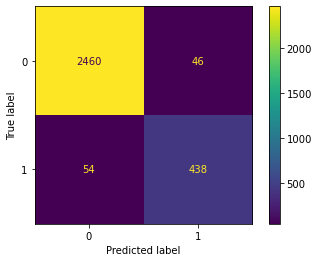

In [62]:
#Make a confusion matrix

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = rf2_opt.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf2_opt.classes_)
disp.plot(values_format='')

This model does not perform as well as the previous one, which is to be expected, since we removed the variable with the highest correlation to turnover rates - employee satisfaction. However, it still performs very well.

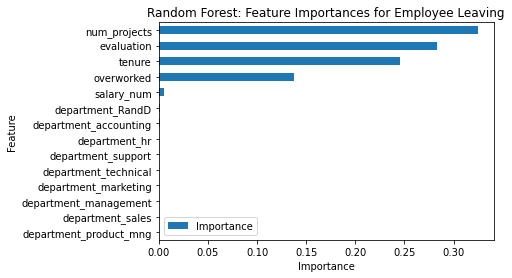

In [65]:
# Get feature importances
feat_impt = rf2_opt.feature_importances_

# Get indices of top 10 features
#ind = np.argpartition(rf2_opt.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns#[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt#[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The features that are most influential to an employee leaving the company are: the number of projects they are working on, their last evaluation, how long they have been at the company, and if they are working too many hours. Salary also has some influence, but much less than the other features. The department the employee works in does not seem to have a strong influence on whether or not they leave the company.

#### We will now try an XGBoost model to compare with the random forest.

Because this model cannot run in parallel on multiple processing units, the computation time is usually much larger than for random forests. Therefore I will simplify the model by using less features. I will remove the department variables, since they did not show much influence on turnover rates. 

In [66]:
#Let's start by separating the X and Y variables 
y = df1['left']
X = df1[['evaluation', 'num_projects', 'tenure', 'salary_num', 'overworked']]

#Now let's split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [71]:
# Define XGBClassifier.
xgb = XGBClassifier(objective='binary:logistic', random_state=12)

# Define parameters
cv_params = {'max_depth': [4, 6],
            'min_child_weight': [3, 5],
            'learning_rate': [0.1, 0.3],
            'n_estimators': [25, 50],
            'subsample': [0.7],
            'colsample_bytree': [1.0]
            }
    
# Define criteria as `scoring`.
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [74]:
# Construct  GridSearch.
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 4, refit = 'f1', verbose=1)

In [75]:
%time
# fit the GridSearch model to training data
xgb_cv = xgb_cv.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed: 46.4min finished


In [77]:
# Obtain optimal parameters.
xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 25,
 'subsample': 0.7}

In [78]:
#Use pickle to save the model
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

In [82]:
## Use optimal parameters from GridSearchCV.
xgb_opt = XGBClassifier(objective='binary:logistic', random_state=12, 
                       max_depth= 6, min_child_weight= 3,learning_rate= 0.3,
                        n_estimators= 25, subsample= 0.7, colsample_bytree= 1.0)

In [83]:
%%time
# Fit the optimal model.
xgb_opt.fit(X_train, y_train)

CPU times: user 1min 40s, sys: 248 ms, total: 1min 40s
Wall time: 50.2 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=12, reg_alpha=0, ...)

In [84]:
#Use pickle to save the model
pickle.dump(xgb_opt, open('xgb_opt.sav', 'wb'))

In [85]:
# Predict on test set.
y_pred = xgb_opt.predict(X_test)

#Obtain performance scores

# Get precision score.
pc_test3 = precision_score(y_test, y_pred, pos_label = 1)
print("The precision score is {pc:.3f}".format(pc = pc_test3))
# Get recall score.
rc_test3 = recall_score(y_test, y_pred, pos_label = 1)
print("The recall score is {rc:.3f}".format(rc = rc_test3))
# Get accuracy score.
ac_test3 = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test3))
# Get F1 score.
f1_test3 = f1_score(y_test, y_pred, pos_label = 1)
print("The F1 score is {f1:.3f}".format(f1 = f1_test3))

The precision score is 0.907
The recall score is 0.892
The accuracy score is 0.967
The F1 score is 0.900


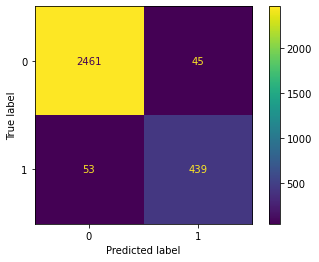

In [86]:
#Make a confusion matrix

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = xgb_opt.classes_)

# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_opt.classes_)
disp.plot(values_format='')

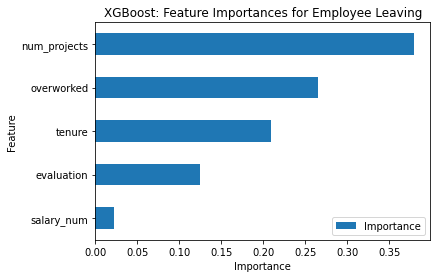

In [87]:
# Get feature importances
feat_impt = xgb_opt.feature_importances_

# Get indices of top 10 features
#ind = np.argpartition(xgb_opt.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns#[ind]

# Filter `feat_impt` to consist of top 10 feature importances
#feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("XGBoost: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [89]:
#Make a table with evaluation metrics in Random Forest and SGBoost models to compare
table = pd.DataFrame({'Model': ["Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [f1_test2, f1_test3],
                      'Recall': [rc_test2, rc_test3],
                      'Precision': [pc_test2, pc_test3],
                      'Accuracy': [ac_test2, ac_test3]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.897541,0.890244,0.904959,0.966644
1,Tuned XGBoost,0.899590,0.892276,0.907025,0.967312


We can see that both models perform very well and have very similar metrics. In both, the number of projects taken on by an employer is the strongest factor influencing their leaving the company, and the salary is the least important of these 5 features. Overworked, tenure and evaluation are the 2nd, 3rd and 4th most important features, but with the order changed between the two models.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



#### My answers: 

- It is clear from the models that there are a number of employees who are working on too many projects and for too many hours, which is leading to employee burnout and therefore turnover. There are likely very few prospects for career progression past 4 or 5 years, which is also leading to a high turnover rate among employees that have been at the company for that long. There is also a large number of employees with high evaluation scores and who work very long hours who are leaving the company. They likely feel pressure to overwork themselves in order to maintain those high evaluation scores. This shows the need for the company to rethink its culture and its high demands on its employees. 

- I recommend putting a cap on the number of projects an employee can take on at a time, and establishing fairer criteria for the evaluation so that employees do not feel like they have to work 65+ hours a week in order to get a good evaluation. I would also recommend putting in place more incentives for employees who have been at the company for 4-5 years, such as better promotion schemes. Lastly, I recommend establishing a culture that does not overincentivize employees to work longer than the necessary 40h/week, to avoid burnout.

- The XGBoost model could possibly be improved by tweaking the hyperparamters some more in order to find the optimal fit. However, there is always the risk of over-fitting the data. Perhaps a better use of time and resources would be to conduct a more thorough analysis on the group of employees who are overworked, in order to better understand why they feel the need to work such long hours and take on too many projects (e.g., check if they are more concentrated in specific departments, or have lower than average salaries). Depending on what is found, some more feature engineering could be performed to improve the model.

- I would be interested in learning more about why employees feel so pressured to work long hours. Are the managers directly demanding them to do so? Are the evaluation criteria so unfair that they know they can only get a good evaluation if they work long hours? Or do employees earn such low wages that they feel like they need to do a lot of overtime to make up for it? Knowing what is the main cause for this would help to determine what are the best recommendations to make to the company to avoid the high turnover rates.

- At this stage the main resources I used are the results from the models and the data analysis conducted.

- Ethical considerations are the same as already mentioned above, regarding employees being severely overworked. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

I applied three different models to the data: a logistic regression model, a Random Forest model, and an XGBoost model. The logistic regression model performed poorly (it was not able to properly identify employees who would leave the company) and was therefore discarded. Both the Random Forest and the XGBoost models performed very well on the data, giving the same values for the evaluation metrics to the 2nd digit:  

- For the Random Forest model, the F1 value was 89.8%, the recall value was 89.0%, the precision was 90.5%, and the accuracy was 96.7%. 

- For the XGBoost model, the F1 value was 90.0%, the recall value was 89.2%, the precision was 90.7%, and the accuracy was 96.7%. 

In both models, the main features that influenced an employee leaving the company were: taking on too many projects taken at a time, working too many hours a month, their scores on their last evaluation, tenure (especially a 4-6 year tenure), and to a lesser extent, low salaries. 

### Conclusion, Recommendations, Next Steps

There is clearly an issue with company culture that needs to be addressed if the company wishes to retain more of its talent. A number of employees work for exceedingly long hours and/or take on far too many projects at a time, and they are dissatisfied and leaving the company at high rates. Employees also do not seem to see good career prospects after the first 3 years, which is when turnover rates begin to increase. 

I would make the following recommendations to the stakeholders: 

- Put a cap on the number of projects a single employee can take on at a time. This should not exceed 5, unless absolutely necessary (and should never exceed 6). 

- Establish a fairer set of criteria for evaluations, which do not overcompensate employees who work very long hours. An employee should not be expected to work 200+ hours a month in order to get a good evaluation. 

- Conduct a company-wide discussion on the culture around overtime, to try to better understand why employees are feeling pressured to work 200+ hours a month. If possible, conduct a new survey to gain better insight into why employees feel the need to work such long hours - whether it is because of direct pressure from their managers, unrealistic expectations regarding workload, or to increase their wages with overtime pay. Depending on the result of this survey/discussion, the following recommendations could be made: 

 - conduct a discussion with managers and team leaders on company culture, establishing a more balanced culture that does not overincentivize employees doing overtime or committing to unrealistic workloads; 
 - hire more people in certain key areas to help mitigate overly concentrated workloads; 
 - consider increasing the pay for a certain group of employees so that they do not feel the need to work overtime to compensate for low wages. 
 
- Establish a better policy for career progression, with more options for promotion after 3-4 years, to avoid employees becoming dissatisfied after 4-5 years at the company. 

The next steps are to implement the recommendations and to analyze the results of the survey on overtime, in order to yield better insights into company culture. We can also conduct a more thorough analysis on the group of employees who are overworked, to try to gain more insight into why they feel the need to work such long hours, with the data that we already have.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.